In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import joblib

In [7]:
# Reading the wind  wind_data from the CSV file into a DataFrame.
wind_data = pd.read_csv("wind.csv")

# Converting the 'dt' column to datetime format using the specified format string.
wind_data['dt'] = pd.to_datetime(wind_data['dt'], format='%d-%m-%Y %H:%M')

# Removing optional and redundant columns from the DataFrame.
# Using list comprehension to filter out columns present in the DataFrame.
optional_columns = ['s_speed100' ,'s10', 'w98mWV', 'w78mWV', 'w48mWV', 'Column1']
existing_columns = [col for col in optional_columns if col in wind_data.columns]
wind_data = wind_data.drop(columns=existing_columns)
#Add columns for year, month, day, and hour
wind_data['year'] = wind_data['dt'].dt.year
wind_data['month'] = wind_data['dt'].dt.month
wind_data['day'] = wind_data['dt'].dt.day
wind_data['hour'] = wind_data['dt'].dt.hour


# Handling missing values by filling them with the mean of their respective columns.
wind_data = wind_data.fillna(wind_data.mean())

# Ensuring that all remaining colum'''ns (excluding 'dt') are converted to numeric data type.
# Selecting columns with float or integer data types and converting them to numeric type.
numeric_columns = wind_data.select_dtypes(include=[float, int]).columns
wind_data[numeric_columns] = wind_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Normalizing/Standardizing the data to have a mean of 0 and a standard deviation of 1.
# Using StandardScaler from scikit-learn library for normalization.
'''scaler = StandardScaler()
wind_data_scaled = pd.DataFrame(scaler.fit_transform(wind_data[numeric_columns]), columns=numeric_columns)'''

# Combining the datetime column with the scaled numerical data to create the preprocessed DataFrame.
# Using concat function to combine two DataFrames along the columns axis.
# Displaying the first few rows of the preprocessed dataset to ensure correctness.
wind_data.head()

,dt,n_speed100,s80,s50,s20,pressure,w98mWV,w78mWV,w48mWV,temperature,humidity,year,month,day,hour
0,2018-12-01 00:00:00,10.654,5.182,7.096,4.852,1012.2,52.0,45.0,29.5,22.5,46.5,2018,12,1,0
1,2018-12-01 00:10:00,10.531,5.334,7.415,4.953,1012.1,53.4,47.8,32.3,22.2,47.5,2018,12,1,0
2,2018-12-01 00:20:00,9.976,5.319,7.398,4.796,1012.2,53.4,46.4,29.5,22.1,48.3,2018,12,1,0
3,2018-12-01 00:30:00,9.617,5.319,7.430,4.749,1012.1,52.0,46.4,30.9,22.2,48.5,2018,12,1,0
4,2018-12-01 00:40:00,9.001,5.363,7.344,4.833,1012.0,53.4,47.8,32.3,22.2,49.0,2018,12,1,0


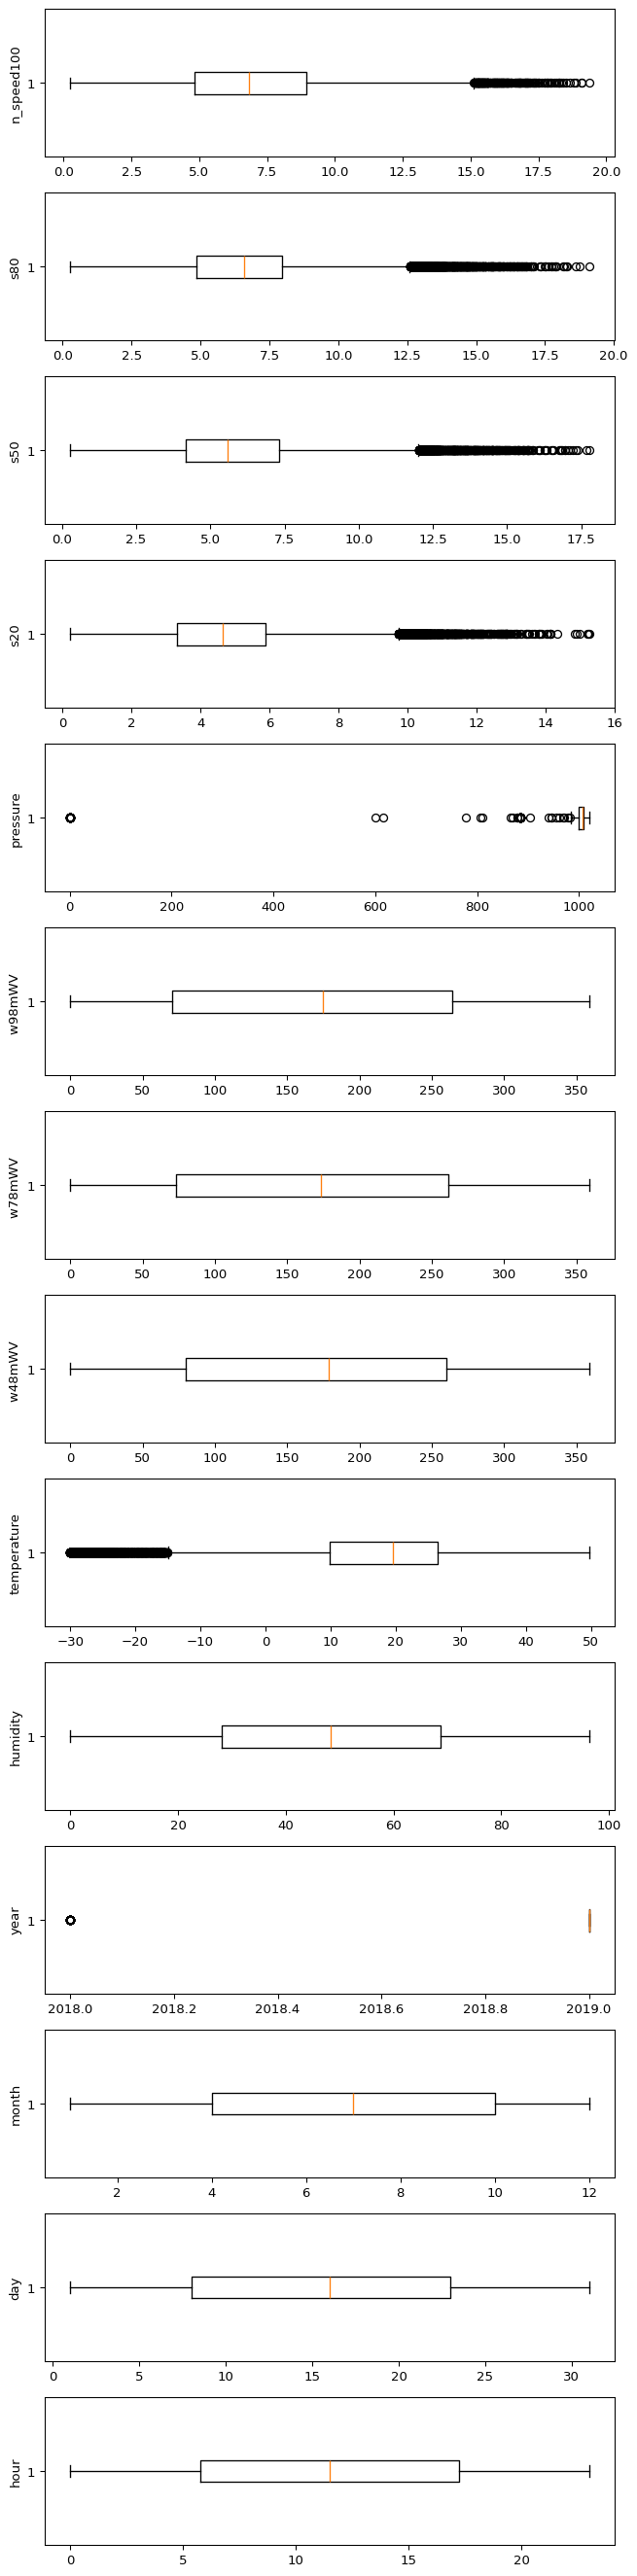

In [8]:
# Determining the number of numeric columns (excluding the datetime column) in the preprocessed dataset.
num_cols = len(wind_data.columns[1:])

# Creating subplots dynamically based on the number of numeric columns, with a predefined figure size and DPI.
fig, axs = plt.subplots(num_cols, 1, dpi=95, figsize=(7, 2*num_cols))

# Ensuring axs is an array, even if there's only one subplot
if num_cols == 1:
    axs = [axs]

# Plotting each numeric column in a separate subplot using box plots.
for i, col in enumerate(wind_data.columns[1:]):
    axs[i].boxplot(wind_data[col], vert=False)  # Box plot for each column
    axs[i].set_ylabel(col)  # Setting y-axis label as column name

# Adjusting the layout to prevent overlapping of subplots and displaying the plot.
plt.tight_layout()
plt.show()

In [9]:
# Iterate over columns starting from the second column index (index 1)
for i, col in enumerate(wind_data.columns[1:]):

    # Calculate the first quartile (Q1) and third quartile (Q3) using numpy's percentile function
    q1, q3 = np.percentile(wind_data[col], [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Calculate the lower bound for outlier detection
    lower_bound = q1 - (1.5 * iqr)

    # Calculate the upper bound for outlier detection
    upper_bound = q3 + (1.5 * iqr)

    # Count outliers before removal
    outliers_before = ((wind_data[col] < lower_bound) | (wind_data[col] > upper_bound)).sum()

    # Filter the data frame to keep only the rows where the values are within the lower and upper bounds
    # Create a boolean mask for outliers
    outlier_mask = (wind_data[col] < lower_bound) | (wind_data[col] > upper_bound)

    # Instead of removing outliers, replace them with the mean
    wind_data.loc[outlier_mask, col] = wind_data[col].mean()

    # Count outliers after replacement (should be 0)
    outliers_after = ((wind_data[col] < lower_bound) | (wind_data[col] > upper_bound)).sum()

    print(f"Column {col}: Outliers before: {outliers_before}, Outliers after: {outliers_after}")

    # We calculate the interquartile range (IQR) to measure the spread of the middle 50% of the data.
    # If data points fall outside the range defined by the IQR, they are considered outliers.
    # These bounds help in identifying and removing outliers from the dataset.
    # Filtering the dataset ensures that only the rows with values within the calculated bounds are retained,effectively removing outliers.

Column n_speed100: Outliers before: 216, Outliers after: 0
Column s80: Outliers before: 1213, Outliers after: 0
Column s50: Outliers before: 830, Outliers after: 0
Column s20: Outliers before: 1307, Outliers after: 0
Column pressure: Outliers before: 6460, Outliers after: 6460
Column w98mWV : Outliers before: 0, Outliers after: 0
Column w78mWV : Outliers before: 0, Outliers after: 0
Column w48mWV : Outliers before: 0, Outliers after: 0
Column temperature: Outliers before: 5886, Outliers after: 0
Column humidity: Outliers before: 0, Outliers after: 0
Column year: Outliers before: 4464, Outliers after: 4464
Column month: Outliers before: 0, Outliers after: 0
Column day: Outliers before: 0, Outliers after: 0
Column hour: Outliers before: 0, Outliers after: 0


C:\Users\arvin\AppData\Local\Temp\ipykernel_17888\2590551419.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2018.9150684931508' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  wind_data.loc[outlier_mask, col] = wind_data[col].mean()
C:\Users\arvin\AppData\Local\Temp\ipykernel_17888\2590551419.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6.526027397260274' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  wind_data.loc[outlier_mask, col] = wind_data[col].mean()
C:\Users\arvin\AppData\Local\Temp\ipykernel_17888\2590551419.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15.72054794520548' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  win

Training Mean Absolute Error: 0.04605335282468222
Training Mean Squared Error: 0.01576561381155986
Training R^2 Score: 0.9969870935982778
Testing Mean Absolute Error: 0.5503955211496608
Testing Mean Squared Error: 0.7130216931505949
Testing R^2 Score: 0.869145595284885


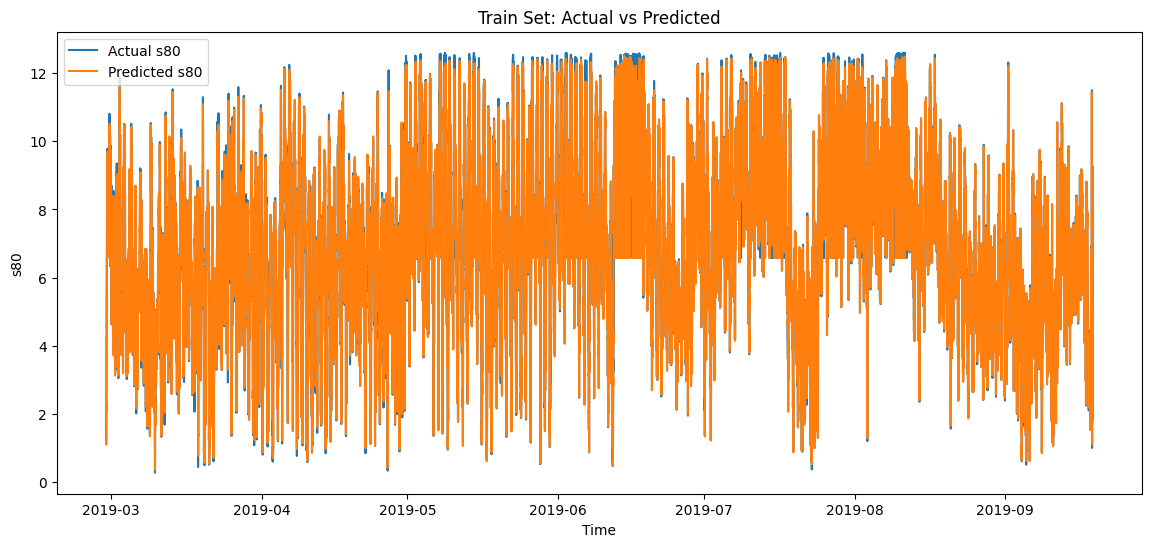

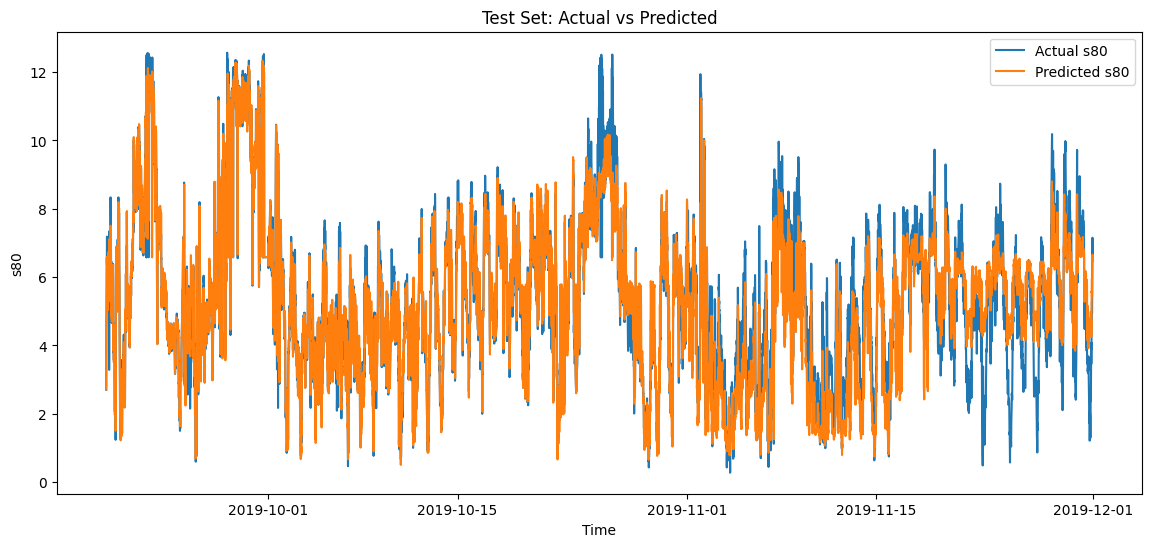

['wind_speed_model12.pkl']

In [10]:
# Set 'dt' as the index for time series analysis
wind_data.set_index('dt', inplace=True)

# Prepare your data
X = wind_data.drop(columns=['s80'])  # Drop 's80' to use it as the target variable
y = wind_data['s80']  # Target variable

# Handle NaNs by filling with mean values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and testing sets based on time
train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Extract 'dt' for later use in plotting
train_dt = X_train.index
test_dt = X_test.index

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions for training and test sets
train_predictions = rf_model.predict(X_train_scaled)
test_predictions = rf_model.predict(X_test_scaled)

# Ensure no negative predictions
train_predictions = np.maximum(train_predictions, 0)
test_predictions = np.maximum(test_predictions, 0)

# Evaluate the model for both training and test sets
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
print(f"Training Mean Absolute Error: {train_mae}")
print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing Mean Absolute Error: {test_mae}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Testing R^2 Score: {test_r2}")

# Function to filter out dates between 12/2018 and 02/2019
def filter_dates(dates, actual, predicted):
    start_date = pd.to_datetime('2018-12-01')
    end_date = pd.to_datetime('2019-02-28')
    mask = (dates < start_date) | (dates > end_date)
    return dates[mask], actual[mask], predicted[mask]

# Plotting function
def plot_results(dates, actual, predicted, title):
    dates, actual, predicted = filter_dates(dates, actual, predicted)
    plt.figure(figsize=(14, 6))
    plt.plot(dates, actual, label='Actual s80')
    plt.plot(dates, predicted, label='Predicted s80')
    plt.xlabel('Time')
    plt.ylabel('s80')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot results for train set
plot_results(train_dt, y_train, train_predictions, 'Train Set: Actual vs Predicted')

# Plot results for test set
plot_results(test_dt, y_test, test_predictions, 'Test Set: Actual vs Predicted')

# Save the model to a file
joblib.dump(rf_model, 'wind_speed_model12.pkl')